# An overview of the data of [KIC 1430163](https://archive.stsci.edu/kepler/data_search/search.php?target=1430163&action=Search&outputformat=HTML_Table) from [Kepler](https://archive.stsci.edu/kepler/)

Written by [Pavel Sobolev](https://github.com/Paveloom) and located [here](https://github.com/Paveloom/C2).

Importing non-standard packages and modules:

[kplr](https://github.com/dfm/kplr) developed by [Daniel Foreman-Mackey](https://github.com/dfm) and other contributors;<br>
[matplotlib](https://github.com/matplotlib/matplotlib) developed by [Michael Droettboom](https://github.com/mdboom),  [Thomas Caswell](https://github.com/tacaswell) and other contributors;<br>
[autograd](https://github.com/HIPS/autograd) developed by [Dougal Maclaurin](https://dougalmaclaurin.com), [David Duvenaud](https://www.cs.toronto.edu/~duvenaud/), [Matt Johnson](http://people.csail.mit.edu/mattjj/), [Jamie Townsend](https://github.com/j-towns) and other contributors;<br>
[timeseries](https://github.com/astropy/astropy/tree/master/astropy/timeseries) module from [astropy](https://github.com/astropy/astropy) developed by contributors.

In [1]:
import kplr  # Tools for working with Kepler data

from matplotlib import rcParams as rcP  # Plot parameters
from matplotlib import pyplot as plt  # 2D Plots

from autograd import numpy as np  # Derivatives of numpy code
from astropy.timeseries import LombScargle  # Computing of the Lomb-Scargle Periodogram

Setting plot parameters:

In [2]:
# A magic command to get inline plots within a Python Notebook
%matplotlib inline

# A magic command to enable 2x plots
%config IPython.matplotlib.backend = "retina"

# Setting the DPIs of figures
rcP["savefig.dpi"] = 300
rcP["figure.dpi"] = 300

# Setting the Computer Modern Bright font
rcP["text.usetex"] = True
rcP["text.latex.preamble"] = r"\usepackage{cmbright}"

# Setting the font sizes
rcP["font.size"] = 16
rcP["legend.fontsize"] = 12

Loading sample data (errors are omitted here) from the [Kepler Input Catalog](https://archive.stsci.edu/kepler/kic.html) (field descriptors are taken from [Kepler Archive Manual](https://archive.stsci.edu/files/live/sites/mast/files/home/missions-and-data/kepler/_documents/archive_manual.pdf)):

In [3]:
# The ID of a star from the Kepler Input Catalog
KIC_ID = 1430163

# Attaching the kplr API
client = kplr.API()

# Getting the star data
star = client.star(KIC_ID)

# Time values
t = []

# Pre-search Data Conditioning Simple Aperture Photometry (PDCSAP) flux values
f = []

# The 1-sigma errors in PDC flux values
ferr = []

# Getting long cadence data of light curves
for lc in star.get_light_curves(short_cadence=False):

    # Reading data from a light curve
    data = lc.read()

    # Getting time values from the data
    t0 = data["TIME"]

    # Getting PDCSAP flux values from the data
    f0 = data["PDCSAP_FLUX"]

    # Creating a mask for only qualitative data points
    mask = (data["SAP_QUALITY"] == 0) & np.isfinite(t0) & np.isfinite(f0)

    # Appending the qualitative time data to the existing list
    t.append(t0[mask])

    # Appending the qualitative flux data
    f.append(f0[mask])

# Concatenating the arrays within the lists

t = np.concatenate(t)
f = np.concatenate(f)

# Getting contiguous arrays

t = np.ascontiguousarray(t, dtype=float)
f = np.ascontiguousarray(f, dtype=float)

Plotting the data (errors are omitted):

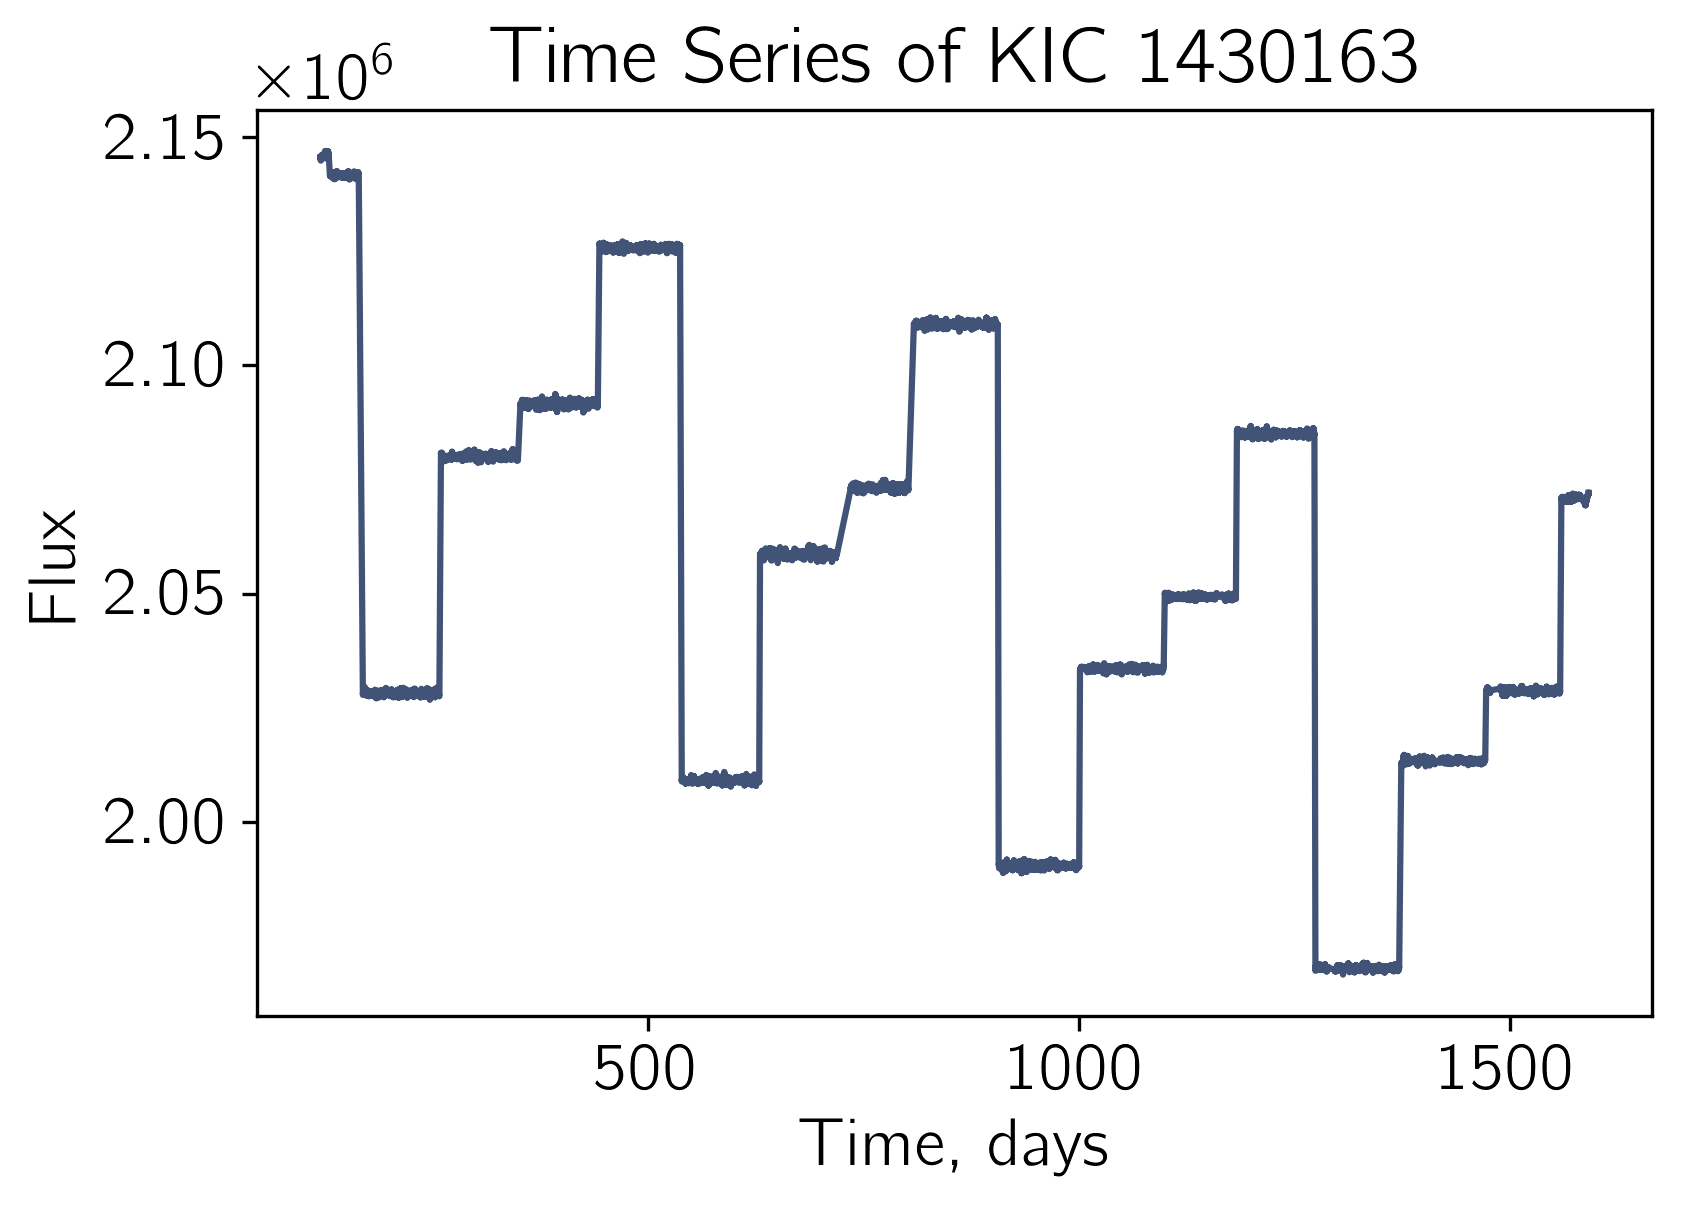

In [4]:
# Plotting the data
plt.plot(t, f, color="#425378")

# Setting labels
plt.xlabel("Time, days")
plt.ylabel("Flux")

# Setting title
plt.title("Time Series of KIC 1430163")

# Saving the figure
plt.savefig("Figures/TS", bbox_inches="tight")

Taking a subset of the data (here: [5th quarter](https://archive.stsci.edu/kepler/preview.php?type=lc&dsn=KPLR001430163-2010174085026) of the long cadence data):

In [5]:
# Defining a mask with time bounds
mask = (t >= 443.5105) & (t <= 537.5502295)

# Taking the subset
t = t[mask]
f = f[mask]

# Printing the size of the subset
print("Size of the subset:", len(t))

# Printing the mean of the flux
mean = f.mean()
print("Mean of the flux:", mean)
print("Log of this mean:", np.log(mean))

# Printing the variance of the subset
var = f.var()
print("Variance of the subset:", var)
print("Log of this variance:", np.log(var))

# Calculating the mean of the time differences between observations
t_diff = []
for i in range(1,len(t)-1):
    t_diff.append(t[i] - t[i-1])
mean_diff = sum(t_diff)/len(t_diff)
    
# Printing the mean of the time differences
print("Mean of the time differences:", mean_diff)
print("Log of this mean:", np.log(mean_diff))
print("1 / Log of this mean:", 1 / np.log(mean_diff))

Size of the subset: 3518
Mean of the flux: 2125677.794343377
Log of this mean: 14.569601271527018
Variance of the subset: 209341.77919483604
Log of this variance: 12.251723502440475
Mean of the time differences: 0.02661837558254352
Log of this mean: -3.6261534903210113
1 / Log of this mean: -0.2757743164124785


Plotting the data ([5th quarter](https://archive.stsci.edu/kepler/preview.php?type=lc&dsn=KPLR001430163-2010174085026)):

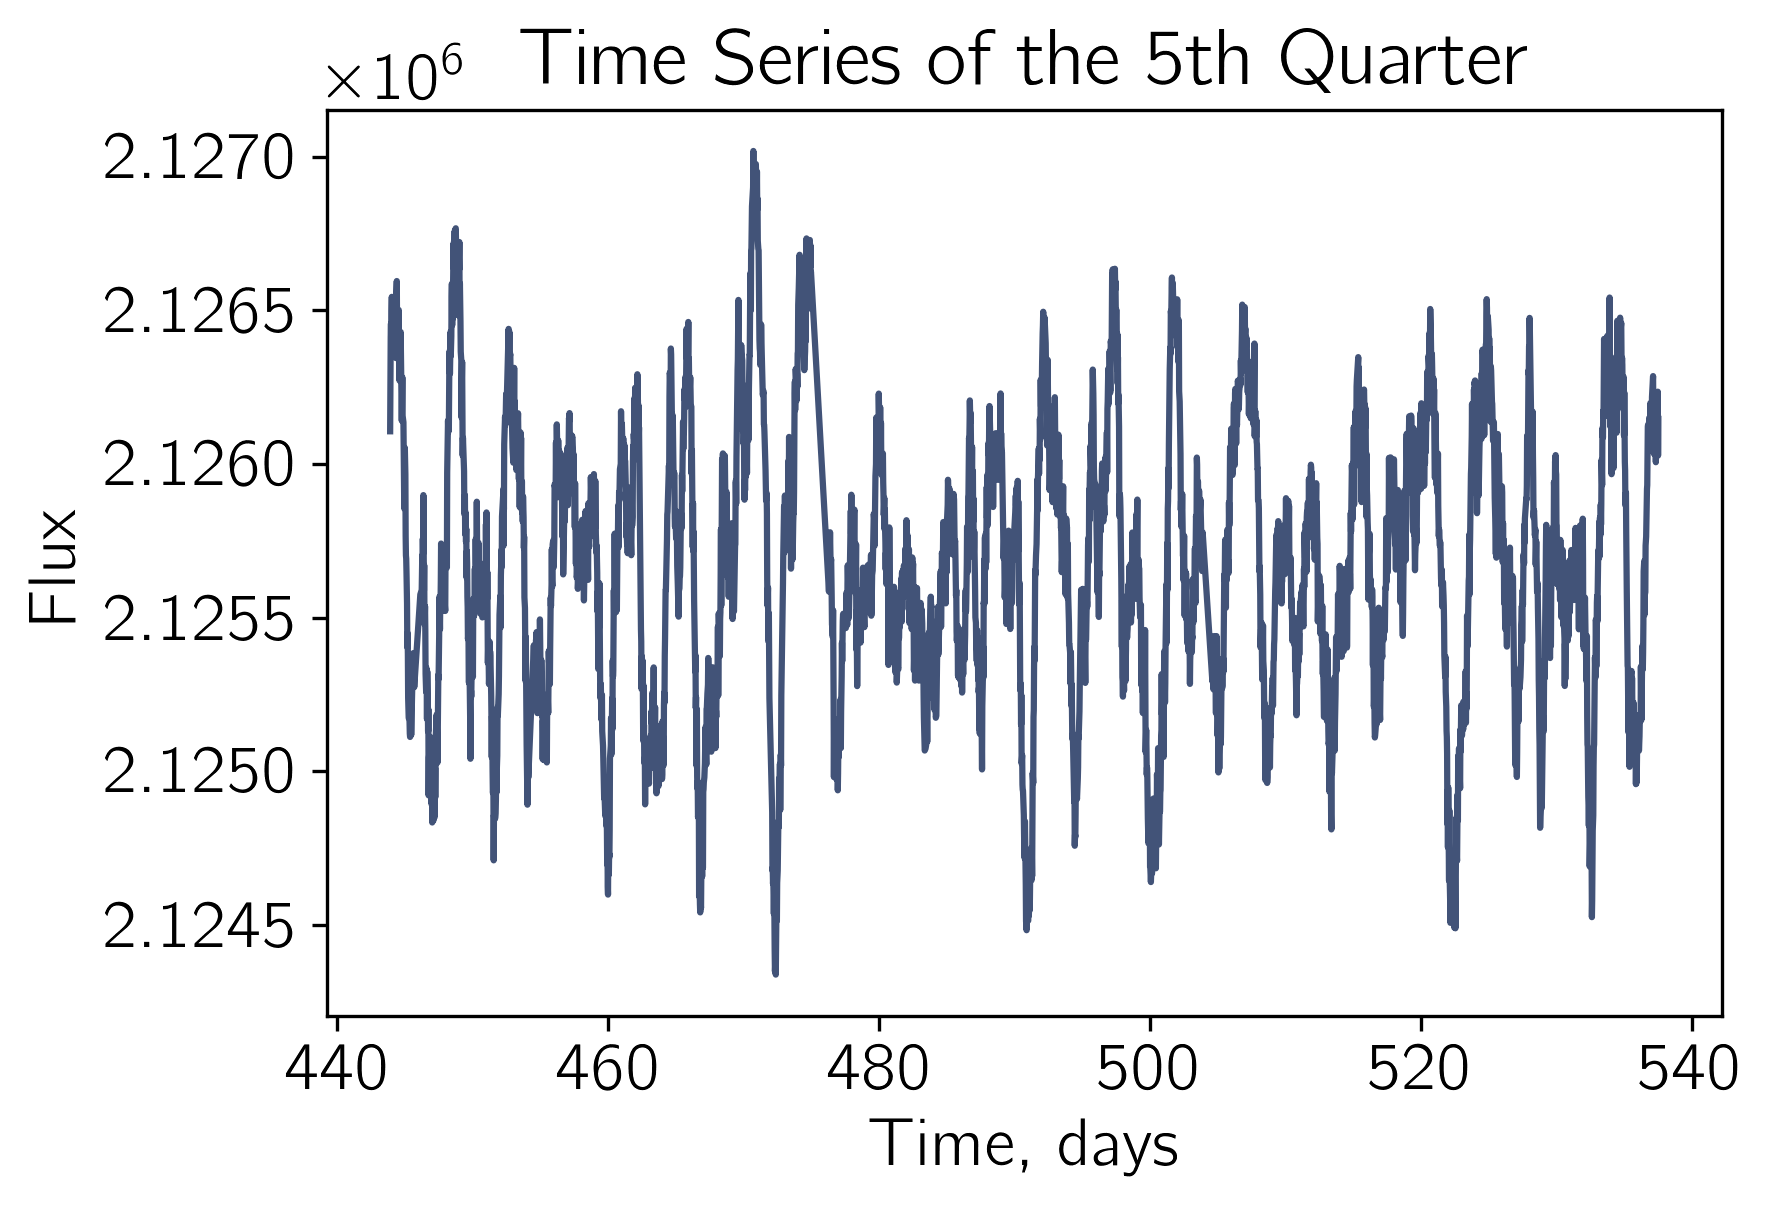

In [6]:
# Plotting the data
plt.plot(t, f, color="#425378")

# Setting labels
plt.xlabel("Time, days")
plt.ylabel("Flux")

# Setting title
plt.title("Time Series of the 5th Quarter")

# Saving the figure
plt.savefig("Figures/TS_45", bbox_inches="tight")

Plotting the Lomb-Scargle periodogram (see, e.g VanderPlas ([2017](https://www.mendeley.com/catalogue/understanding-lombscargle-periodogram-1/))):

The peak is at 0.22226554463820566


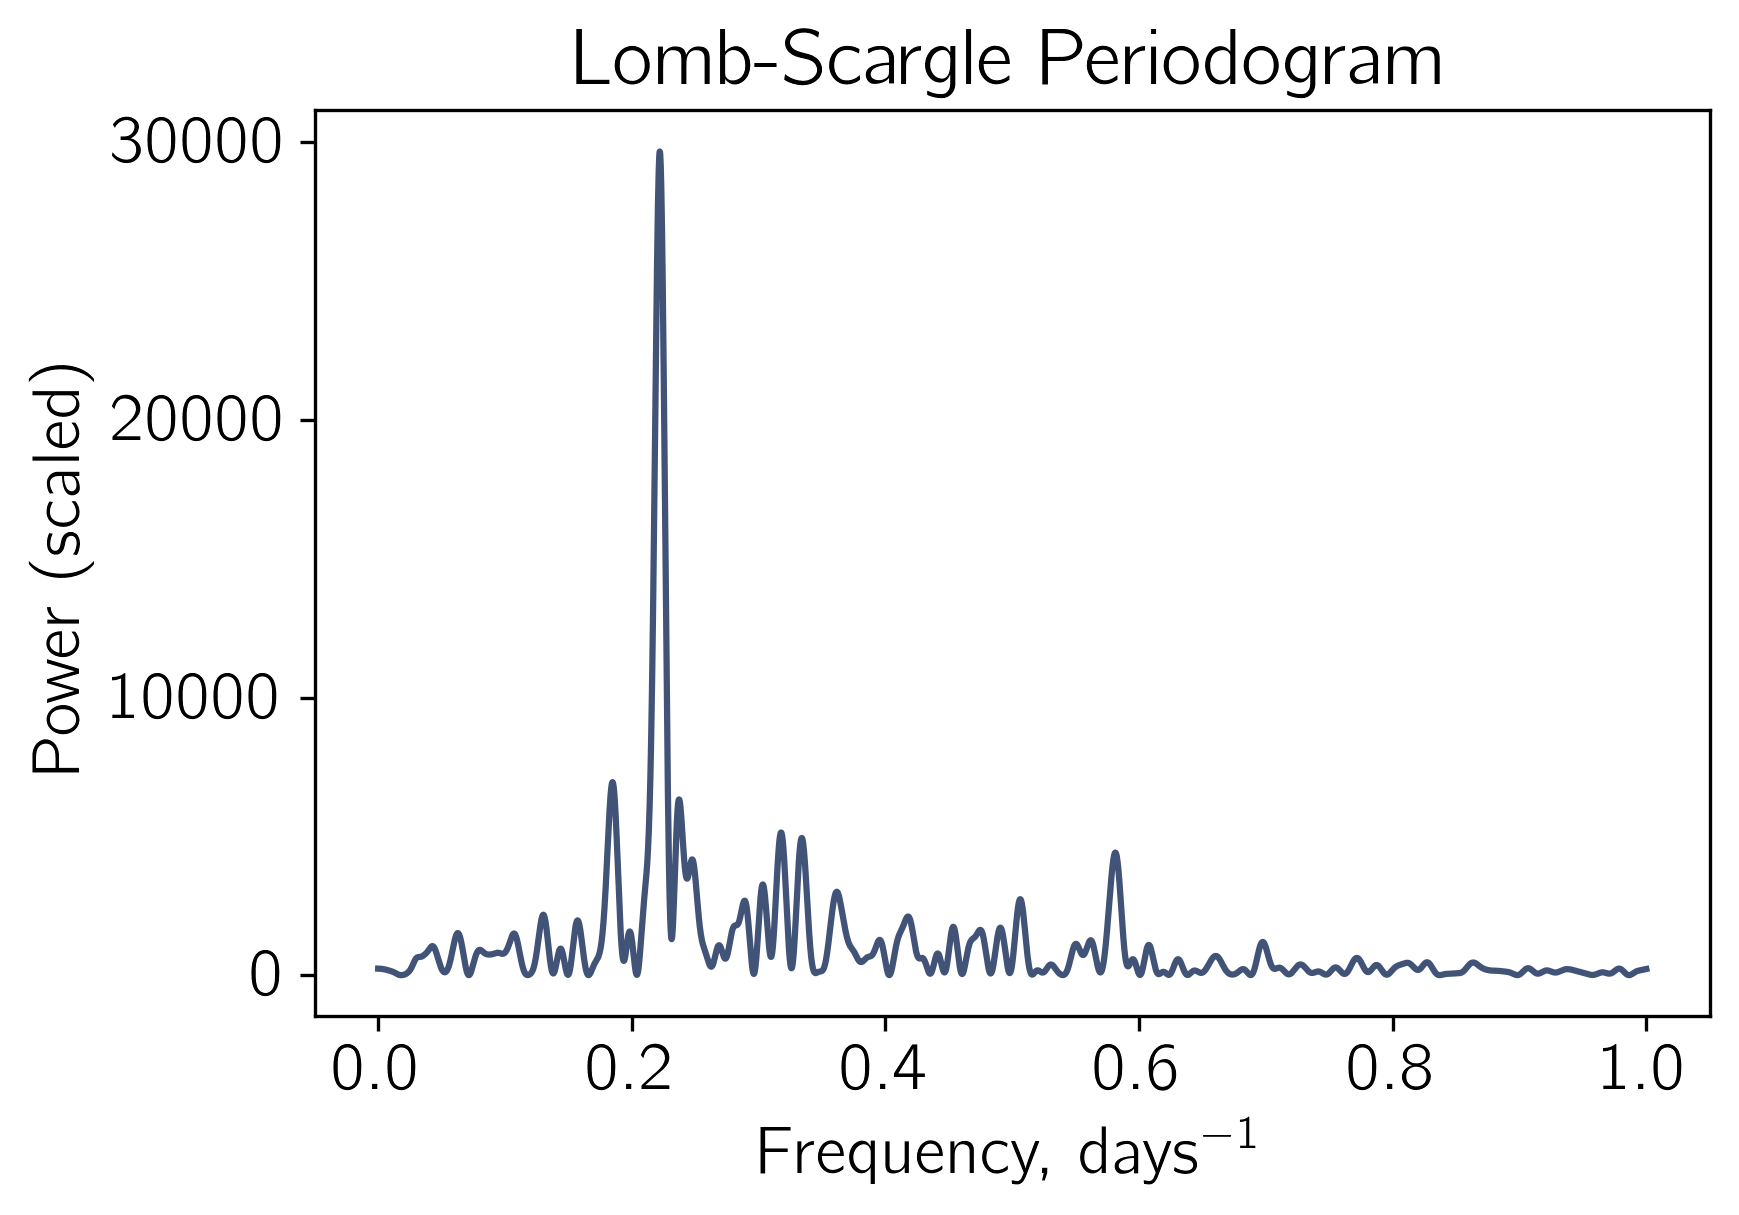

In [7]:
# Creating a set of evenly spaced frequencies
freq = np.linspace(1/len(t), 1.0, 5000)

# Getting the PSD-normalized Lomb-Scargle power spectrum of the data using the fast method (O[N log N])
power = LombScargle(t, f).power(freq, method="fast", normalization="psd")

# Scaling the output
power /= len(t)

# Printing info about the peak value
peak = freq[np.argmax(power)]
print("The peak is at", peak)

# Plotting data
plt.plot(freq, power, color="#425378")

# Setting labels
plt.xlabel(r"Frequency, days$^{-1}$")
plt.ylabel("Power (scaled)")

# Setting title
plt.title("Lomb-Scargle Periodogram")

# Saving the figure
plt.savefig("Figures/LSP", bbox_inches="tight")

Same, but with logarithmic scale:

The peak is at -1.5038824649048004


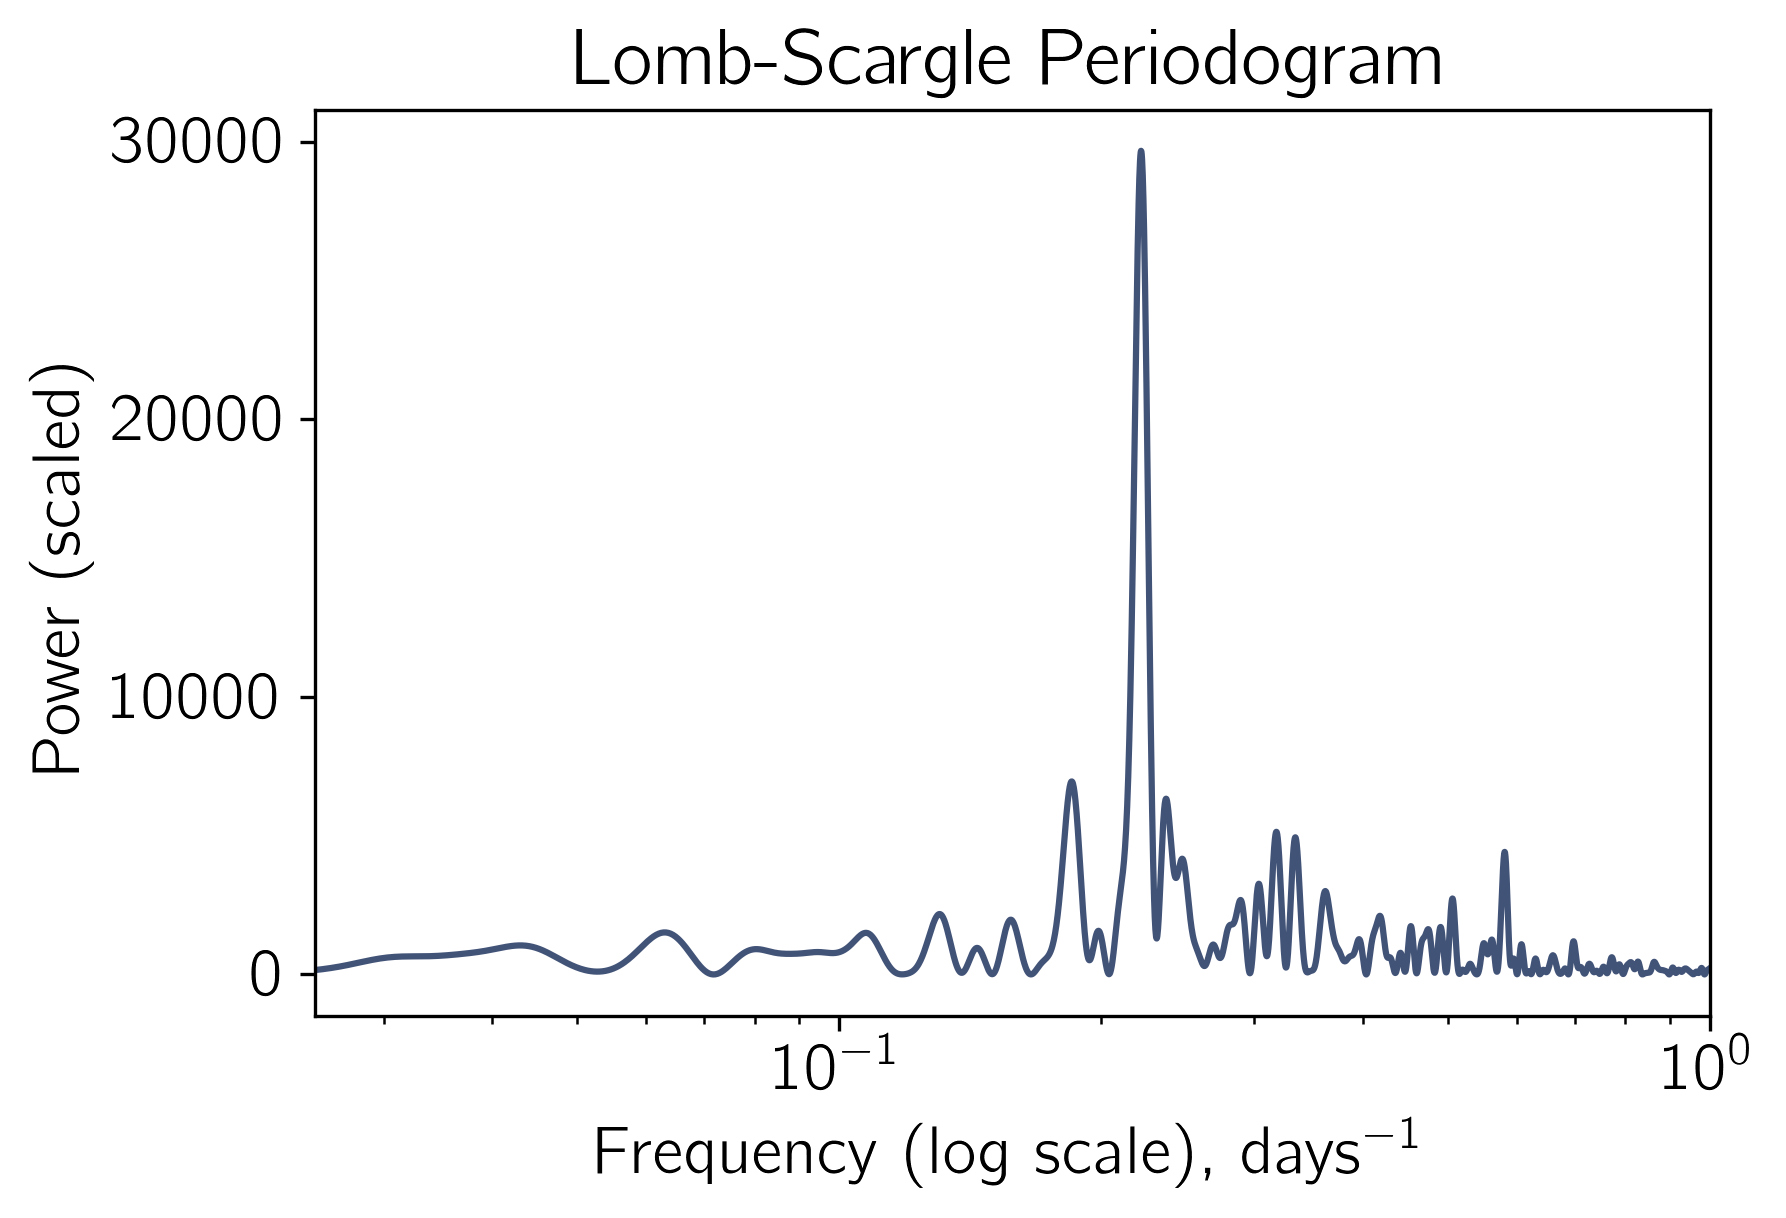

In [8]:
# Plotting data
plt.plot(freq, power, color="#425378")

# Setting logarithmic scale
plt.xscale("log")

# Printing info about the peak value
print("The peak is at", np.log(peak))

# Setting limits
plt.xlim(0.025,1)

# Setting labels
plt.xlabel(r"Frequency (log scale), days$^{-1}$")
plt.ylabel("Power (scaled)")

# Setting title
plt.title("Lomb-Scargle Periodogram")

# Saving the figure
plt.savefig("Figures/LSP_log", bbox_inches="tight")